In [114]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

img_path = os.path.join("./obj_train_data/frame_000000.jpg")
txt_path = os.path.join("./obj_train_data/frame_000000.txt")

HEADER = ["label", "x", "y", "w", "h"]

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
txt = pd.read_csv(txt_path, delimiter=" ", header=None, names=HEADER)
txt = txt.query('label in [0, 1]')
txt

,label,x,y,w,h
0,0,0.460785,0.435701,0.014555,0.040069
1,0,0.813634,0.459493,0.020648,0.045912
2,0,0.969525,0.388539,0.019721,0.035894
3,0,0.991570,0.546720,0.016859,0.048412
4,1,0.962951,0.574269,0.009391,0.021694


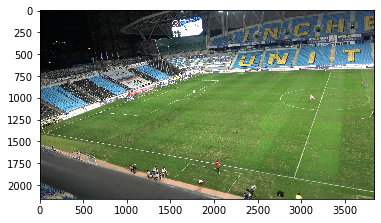

In [115]:
IMG_WIDTH  = img.shape[1]
IMG_HEIGHT = img.shape[0]

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(20, 10))
plt.imshow(rgb)
plt.show()

In [163]:
cvt_txt = pd.DataFrame()

cvt_txt['label'] = txt.label
cvt_txt['x'] = txt.x * IMG_WIDTH
cvt_txt['y'] = txt.y * IMG_HEIGHT
cvt_txt['w'] = txt.w * IMG_WIDTH
cvt_txt['h'] = txt.h * IMG_HEIGHT

cvt_txt = cvt_txt[['label', 'x', 'y', 'w', 'h']].applymap(int)
cvt_txt

,label,x,y,w,h
0,0,1769,941,55,86
1,0,3124,992,79,99
2,0,3722,839,75,77
3,0,3807,1180,64,104
4,1,3697,1240,36,46


In [120]:
from scipy.spatial.distance import cdist

center_mat = cvt_txt[['x', 'y']]

dist_mat = cdist(center_mat, center_mat)
dist_mat = pd.DataFrame(dist_mat)
dist_mat

,0,1,2,3,4
0,0.000000,1355.959439,1955.661781,2051.966130,1951.047155
1,1355.959439,0.000000,617.262505,708.401722,624.366079
2,1955.661781,617.262505,0.000000,351.434204,401.778546
3,2051.966130,708.401722,351.434204,0.000000,125.299641
4,1951.047155,624.366079,401.778546,125.299641,0.000000


In [139]:
near_dist = dist_mat < (412 / 2)
near_dist

,0,1,2,3,4
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,True,False,False
3,False,False,False,True,True
4,False,False,False,True,True


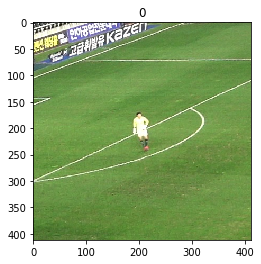

0 0.5 0.5 0.133495 0.208738


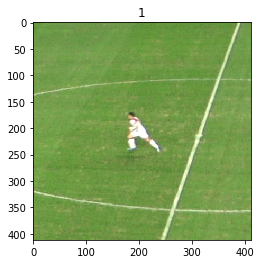

0 0.5 0.5 0.191748 0.240291


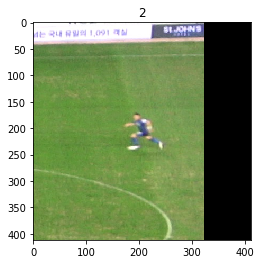

0 0.5 0.5 0.182039 0.186893


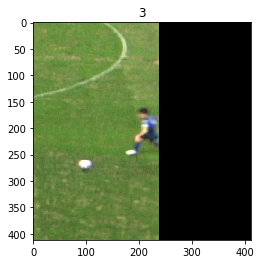

0 0.5 0.5 0.15534 0.252427
1 0.23301 0.645631 0.087379 0.11165


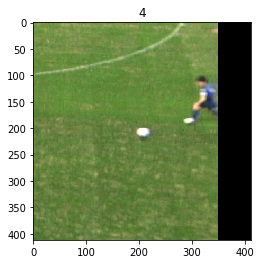

0 0.76699 0.354369 0.15534 0.252427
1 0.5 0.5 0.087379 0.11165


In [168]:
CROP_SIZE_HALF = 206
CROP_SIZE      = CROP_SIZE_HALF * 2

img_ = img.copy()

for i in range(5):
    crop_img_center_x = cvt_txt.iloc[i].x
    crop_img_center_y = cvt_txt.iloc[i].y

    crop_img_start_x = crop_img_center_x - CROP_SIZE_HALF
    crop_img_end_x   = crop_img_center_x + CROP_SIZE_HALF
    crop_img_start_y = crop_img_center_y - CROP_SIZE_HALF
    crop_img_end_y   = crop_img_center_y + CROP_SIZE_HALF

    crop_img = img_[crop_img_start_y:crop_img_end_y,
                    crop_img_start_x:crop_img_end_x]

    crop_img_shape = crop_img.shape

    if crop_img.shape[0] < (CROP_SIZE):
        crop_img = np.pad(crop_img, ((0, CROP_SIZE - crop_img_shape[0]), (0, 0), (0, 0)), 'constant', constant_values=(0))

    if crop_img.shape[1] < (CROP_SIZE):
        crop_img = np.pad(crop_img, ((0, 0), (0, CROP_SIZE - crop_img_shape[1]), (0, 0)), 'constant', constant_values=(0))

    rgb = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.title(str(i))
    plt.show()

    for j in near_dist[near_dist.iloc[i]].index.to_numpy():
        box_label    = cvt_txt.iloc[j].label
        box_center_x = round((cvt_txt.iloc[j].x - crop_img_start_x) / CROP_SIZE, 6)
        box_center_y = round((cvt_txt.iloc[j].y - crop_img_start_y) / CROP_SIZE, 6)
        box_w        = round(cvt_txt.iloc[j].w / CROP_SIZE, 6)
        box_h        = round(cvt_txt.iloc[j].h / CROP_SIZE, 6)
        
        print(box_label, box_center_x, box_center_y, box_w, box_h)

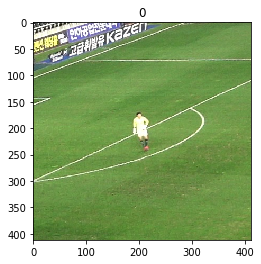

0 0.5 0.5 0.133495 0.208738


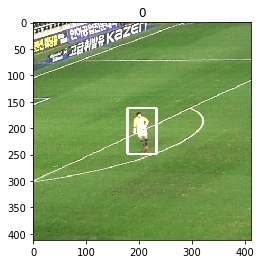

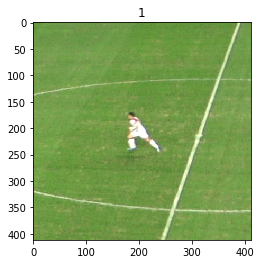

0 0.5 0.5 0.191748 0.240291


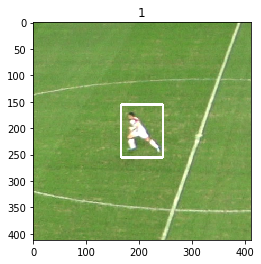

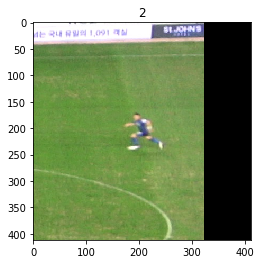

0 0.5 0.5 0.182039 0.186893


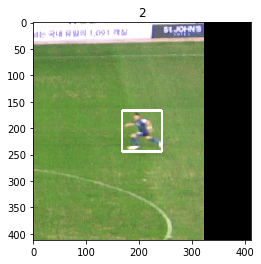

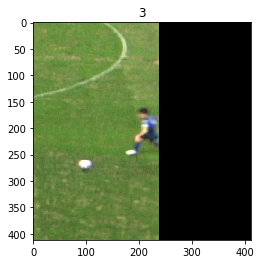

0 0.5 0.5 0.15534 0.252427


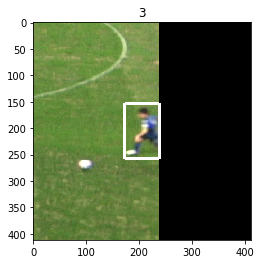

1 0.23301 0.645631 0.087379 0.11165


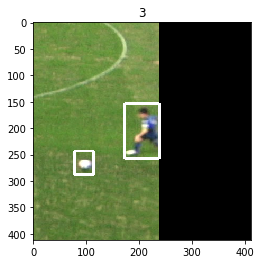

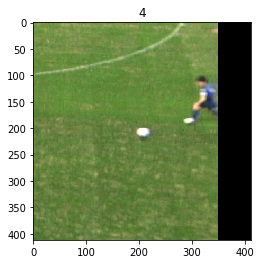

0 0.76699 0.354369 0.15534 0.252427


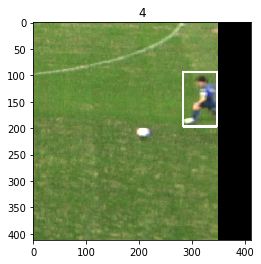

1 0.5 0.5 0.087379 0.11165


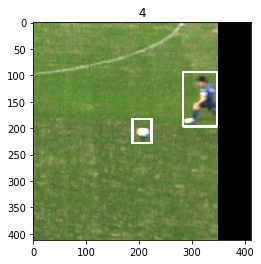

In [177]:
CROP_SIZE_HALF = 206
CROP_SIZE      = CROP_SIZE_HALF * 2

img_ = img.copy()

for i in range(5):
    crop_img_center_x = cvt_txt.iloc[i].x
    crop_img_center_y = cvt_txt.iloc[i].y

    crop_img_start_x = crop_img_center_x - CROP_SIZE_HALF
    crop_img_end_x   = crop_img_center_x + CROP_SIZE_HALF
    crop_img_start_y = crop_img_center_y - CROP_SIZE_HALF
    crop_img_end_y   = crop_img_center_y + CROP_SIZE_HALF

    crop_img = img_[crop_img_start_y:crop_img_end_y,
                    crop_img_start_x:crop_img_end_x]

    crop_img_shape = crop_img.shape

    if crop_img.shape[0] < (CROP_SIZE):
        crop_img = np.pad(crop_img, ((0, CROP_SIZE - crop_img_shape[0]), (0, 0), (0, 0)), 'constant', constant_values=(0))

    if crop_img.shape[1] < (CROP_SIZE):
        crop_img = np.pad(crop_img, ((0, 0), (0, CROP_SIZE - crop_img_shape[1]), (0, 0)), 'constant', constant_values=(0))

    rgb = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.title(str(i))
    plt.show()

    for j in near_dist[near_dist.iloc[i]].index.to_numpy():
        box_label    = cvt_txt.iloc[j].label
        box_center_x = round((cvt_txt.iloc[j].x - crop_img_start_x) / CROP_SIZE, 6)
        box_center_y = round((cvt_txt.iloc[j].y - crop_img_start_y) / CROP_SIZE, 6)
        box_w        = round(cvt_txt.iloc[j].w / CROP_SIZE, 6)
        box_h        = round(cvt_txt.iloc[j].h / CROP_SIZE, 6)
        
        print(box_label, box_center_x, box_center_y, box_w, box_h)

        
        crop_img = cv2.rectangle(crop_img, 
                                 (int((box_center_x - box_w / 2) * CROP_SIZE), int((box_center_y - box_h / 2) * CROP_SIZE)),
                                 (int((box_center_x + box_w / 2) * CROP_SIZE), int((box_center_y + box_h / 2) * CROP_SIZE)),
                                (255, 255, 255), 3)
        rgb = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb)
        plt.title(str(i))
        plt.show()        